In [13]:
using Pkg
using DataFrames, CSV
using Query
using TimeSeries
using Plots
using LinearAlgebra
using Wavelets
using Statistics

In [2]:
float_pop = CSV.read("./floating_population.csv")

,Column1,citycode,dailyid,datetime
,Int64,Float64,Int64,String
1,0,13101.0,1039,2019-06-01 10:00:00
2,1,13102.0,711,2019-06-01 10:00:00
3,2,13103.0,1031,2019-06-01 10:00:00
4,3,13104.0,920,2019-06-01 10:00:00
5,4,13105.0,365,2019-06-01 10:00:00
6,5,13106.0,505,2019-06-01 10:00:00
7,6,13107.0,444,2019-06-01 10:00:00
8,7,13108.0,727,2019-06-01 10:00:00
9,8,13109.0,613,2019-06-01 10:00:00


While `DataFrames.jl` provide basic manipulation capabilities. Users are recommended to use `Query.jl` for more advanced manipulation capabilities.

In [3]:
wide_float_pop = unstack(float_pop, :citycode, :datetime, :dailyid)

,citycode,2019-06-01 10:00:00,2019-06-01 11:00:00,2019-06-01 12:00:00,2019-06-01 13:00:00
,Float64,Int64?,Int64?,Int64?,Int64?
1,13101.0,1039,1113,1245,1183
2,13102.0,711,744,839,805
3,13103.0,1031,1144,1258,1192
4,13104.0,920,1022,1147,1146
5,13105.0,365,398,459,493
6,13106.0,505,573,667,656
7,13107.0,444,416,438,424
8,13108.0,727,809,839,786
9,13109.0,613,724,701,625


In [4]:
float_pop_matrix = Matrix(wide_float_pop)[:,2:513]

32×512 Array{Union{Missing, Float64},2}:
 1039.0  1113.0  1245.0  1183.0  1178.0  …  1029.0  1103.0  1123.0  1111.0
  711.0   744.0   839.0   805.0   770.0      706.0   678.0   739.0   750.0
 1031.0  1144.0  1258.0  1192.0  1193.0      974.0  1011.0  1038.0  1047.0
  920.0  1022.0  1147.0  1146.0  1163.0     1023.0  1088.0  1119.0  1135.0
  365.0   398.0   459.0   493.0   427.0      373.0   385.0   400.0   444.0
  505.0   573.0   667.0   656.0   632.0  …   635.0   659.0   651.0   661.0
  444.0   416.0   438.0   424.0   444.0      369.0   408.0   453.0   434.0
  727.0   809.0   839.0   786.0   807.0      726.0   730.0   791.0   777.0
  613.0   724.0   701.0   625.0   682.0      606.0   672.0   688.0   740.0
  379.0   422.0   473.0   460.0   441.0      463.0   428.0   465.0   483.0
  780.0   847.0   830.0   770.0   822.0  …   758.0   792.0   872.0   882.0
  912.0   956.0  1009.0   976.0   931.0      817.0   858.0   930.0   955.0
  889.0   988.0  1166.0  1052.0  1146.0     1034.0  1079.0 

In [ ]:
heatmap(float_pop_matrix)

In [5]:
include("../autocorrelation-shell/src/AutocorrelationShell.jl")

Main.AutocorrelationShell

In [6]:
using Main.AutocorrelationShell

In [7]:
using Wavelets

In [8]:
H = wavelet(WT.db2)
L = 6
Q = qfilter(H)
P = pfilter(H)

7-element Array{Float64,1}:
 -0.044194173824159244 
 -5.887846720064156e-17
  0.397747564417433    
  0.7071067811865475   
  0.397747564417433    
 -5.887846720064156e-17
 -0.044194173824159244 

In [9]:
size(float_pop_matrix)

(32, 512)

In [10]:
"""
    wiggle(wav; taxis=1:size(wav,1), zaxis=1:size(wav,2), sc=1, EdgeColor=:black, FaceColor=:black, Orient=:across, Overlap=true, ZDir=:normal)

Plot a set of shaded wiggles
# Arguments
* 'wav::Array': matrix of waveform columns.
* 'taxis::Array=1:size(wav,1)': time axis vector
* 'zaxis::Array=1:size(wav,2)': space axis vector
* 'sc::Float=1': scale factor/magnification.
* 'EdgeColor::Symbol=:black': Sets edge of wiggles color.
* 'FaceColor::Symbol=:black': Sets shading color of wiggles.
* 'Overlap::bool=true': How signals are scaled.
        true  - Signals overlap (default);
        false - Signals are scaled so they do not overlap.
* 'Orient::Symbol=:across': Controls orientation of wiggles.
        :across - from left to right
        :down   - from top to down
* 'ZDir::Symbol=:normal': Direction of space axis.
        :normal  - First signal at bottom (default)
        :reverse - First signal at top.

Translated by Nicholas Hausch -- MATLAB file provided by Naoki Saito
The previous MATLAB version contributors are:
 Anthony K. Booer (SLB) and Bradley Marchand (NSWC-PC)
Revised by Naoki Saito, Feb. 05, 2018
"""
function wiggle(wav; taxis=1:size(wav,1), zaxis=1:size(wav,2), sc=1, EdgeColor=:black, FaceColor=:black, Overlap=true, Orient=:across, ZDir=:normal)

# Set axes
(n,m) = size(wav)

# Sanity check
if length(taxis) != n
    error("Inconsistent taxis dimension!")
end
if length(zaxis) != m
    error("Inconsistent zaxis dimension!")
end

# For calculation purposes
maxrow = zeros(m); minrow = zeros(m)
for k = 1:m
  maxrow[k] = maximum(wav[:,k]); minrow[k] = minimum(wav[:,k])
end

# Scale the data for plotting
wamp = deepcopy(wav)
dt = mean(diff(taxis))
dz = mean(diff(zaxis))
    if Overlap
  wamp *= 2 * dz * (sc/maximum(maxrow-minrow))
else
  wmax = maximum(maxrow); wmin = minimum(minrow);
  if wmax<=0
    wmax = 0
  end
  if wmin>=0
    wmin = 0
  end
    wamp = sc*wav/(wmax-wmin)
end

# Set initial plot
t0 = minimum(taxis)
t1 = maximum(taxis)
z0 = minimum(zaxis)
z1 = maximum(zaxis)
if Orient == :down
 plot(xlims=(z0-dz,z1+dz), ylims=(t0,t1), yflip=true, legend=:none)
else
 plot(xlims=(t0,t1), ylims=(z0-dz,z1+dz), legend=:none)
end
if ZDir == :reverse
    wamp = flipdim(wamp,2)
end

# Plot each wavelet
for k = 1:m
  sig = wamp[:,k]
  t = deepcopy(taxis)
  w_sign = sign.(sig)
  for j=1:n-1
    if (w_sign[j]!=w_sign[j+1] && w_sign[j]!=0 && w_sign[j+1]!=0)
      sig = [sig; 0]
      t = [t; t[j]-sig[j]*(t[j+1]-t[j])/(sig[j+1]-sig[j])]
    end
  end
  IX = sortperm(t)
  t = t[IX]
  sig = sig[IX]
  len = length(t)
  len1 = collect(len:-1:1)
  indperm = [1:len;len1]
  inputx = t[indperm]
  inputy = zaxis[k] .+ [sig;min.(sig[len1],0)]
    # In the plot! functions below, theoretically speaking, either
    # fillrange = zaxis[k] or fillrange=[zaxis[k], zaxis[k]+dz] should be used.
    # However, those do not generate the desired plots as of O3/19/2018.
    # Somehow, the relative value of 0, i.e., fillrange=0, works well,
    # which is used temporarily.
  if Orient == :down
    plot!(inputy, inputx, fillrange=0, fillalpha=0.75, fillcolor=FaceColor, linecolor=EdgeColor, orientation=:v)
  else
    plot!(inputx, inputy, fillrange=0, fillalpha=0.75, fillcolor=FaceColor, linecolor=EdgeColor)
  end
end
plot!() # flushing the display.
end

"""
    wiggle!(wav; taxis=1:size(wav,1), zaxis=1:size(wav,2), sc=1, EdgeColor=:black, FaceColor=:black, Orient=:across, Overlap=true, ZDir=:normal)

Plot a set of shaded wiggles on the current displayed graphics
# Arguments
* 'wav::Array': matrix of waveform columns.
* 'taxis::Array=1:size(wav,1)': time axis vector
* 'zaxis::Array=1:size(wav,2)': space axis vector
* 'sc::Float=1': scale factor/magnification.
* 'EdgeColor::Symbol=:black': Sets edge of wiggles color.
* 'FaceColor::Symbol=:black': Sets shading color of wiggles.
* 'Overlap::bool=true': How signals are scaled.
        true  - Signals overlap (default);
        false - Signals are scaled so they do not overlap.
* 'Orient::Symbol=:across': Controls orientation of wiggles.
        :across - from left to right
        :down   - from top to down
* 'ZDir::Symbol=:normal': Direction of space axis.
        :normal  - First signal at bottom (default)
        :reverse - First signal at top.

Translated by Nicholas Hausch -- MATLAB file provided by Naoki Saito
The previous MATLAB version contributors are:
 Anthony K. Booer (SLB) and Bradley Marchand (NSWC-PC)
Revised by Naoki Saito, Feb. 05, 2018
"""
function wiggle!(wav; taxis=1:size(wav,1), zaxis=1:size(wav,2), sc=1, EdgeColor=:black, FaceColor=:black, Overlap=true, Orient=:across, ZDir=:normal)

# Set axes
(n,m) = size(wav)

# Sanity check
if length(taxis) != n
    error("Inconsistent taxis dimension!")
end
if length(zaxis) != m
    error("Inconsistent zaxis dimension!")
end

# For calculation purposes
maxrow = zeros(m); minrow = zeros(m)
for k = 1:m
  maxrow[k] = maximum(wav[:,k]); minrow[k] = minimum(wav[:,k])
end

# Scale the data for plotting
wamp = deepcopy(wav)
dt = mean(diff(taxis))
dz = mean(diff(zaxis))
    if Overlap
  wamp *= 2 * dz * (sc/maximum(maxrow-minrow))
else
  wmax = maximum(maxrow); wmin = minimum(minrow);
  if wmax<=0
    wmax = 0
  end
  if wmin>=0
    wmin = 0
  end
    wamp = sc*wav/(wmax-wmin)
end

# Set initial plot
t0 = minimum(taxis)
t1 = maximum(taxis)
z0 = minimum(zaxis)
z1 = maximum(zaxis)
if Orient == :down
 plot!(xlims=(z0-dz,z1+dz), ylims=(t0,t1), yflip=true, legend=:none)
else
 plot!(xlims=(t0,t1), ylims=(z0-dz,z1+dz), legend=:none)
end
if ZDir == :reverse
    wamp = flipdim(wamp,2)
end

# Plot each wavelet
for k = 1:m
  sig = wamp[:,k]
  t = deepcopy(taxis)
  w_sign = sign.(sig)
  for j=1:n-1
    if (w_sign[j]!=w_sign[j+1] && w_sign[j]!=0 && w_sign[j+1]!=0)
      sig = [sig; 0]
      t = [t; t[j]-sig[j]*(t[j+1]-t[j])/(sig[j+1]-sig[j])]
    end
  end
  IX = sortperm(t)
  t = t[IX]
  sig = sig[IX]
  len = length(t)
  len1 = collect(len:-1:1)
  indperm = [1:len;len1]
  inputx = t[indperm]
  inputy = zaxis[k] .+ [sig;min.(sig[len1],0)]
    # In the plot! functions below, theoretically speaking, either
    # fillrange = zaxis[k] or fillrange=[zaxis[k], zaxis[k]+dz] should be used.
    # However, those do not generate the desired plots as of O3/19/2018.
    # Somehow, the relative value of 0, i.e., fillrange=0, works well,
    # which is used temporarily.
  if Orient == :down
    plot!(inputy, inputx, fillrange=0, fillalpha=0.75, fillcolor=FaceColor, linecolor=EdgeColor, orientation=:v)
  else
    plot!(inputx, inputy, fillrange=0, fillalpha=0.75, fillcolor=FaceColor, linecolor=EdgeColor)
  end
end
plot!() # flushing the display.
end


wiggle!

In [29]:
decomp_1d = fwt_ac(float_pop_matrix[1,1:512], L, P, Q)

512×4 Array{Float64,2}:
 3277.17  -131.966    -76.873     -48.8788 
 3361.92  -156.81     -12.4199    -19.7548 
 3423.42  -127.854     57.6855     72.1249 
 3454.57   -48.1198   -11.2227    -22.2739 
 3450.15    89.9551  -106.545     -28.7704 
 3405.09   246.215    -54.6094      1.94454
 3318.84   370.063     99.0527    -25.1023 
 3198.28   412.565    150.309      96.4759 
 3052.49   322.015     54.3652    -49.851  
 2896.67   113.554      1.69727   -38.3605 
 2747.63  -156.306     35.4727     56.7011 
 2621.88  -403.152    -27.8125     -2.16551
 2531.61  -537.094   -173.088       0.53033
    ⋮                                      
 2790.45  -176.432    -46.7012    -39.377  
 2679.68  -404.76      -3.23437    65.4958 
 2589.11  -497.383   -112.514      32.1292 
 2532.05  -430.638   -193.234    -141.907  
 2517.95  -242.694    -37.5391     74.0252 
 2545.21   -26.513    152.203      -2.2539 
 2609.41   149.359    137.07       45.3874 
 2703.24   232.453      2.65039   -31.4663 
 2815.87

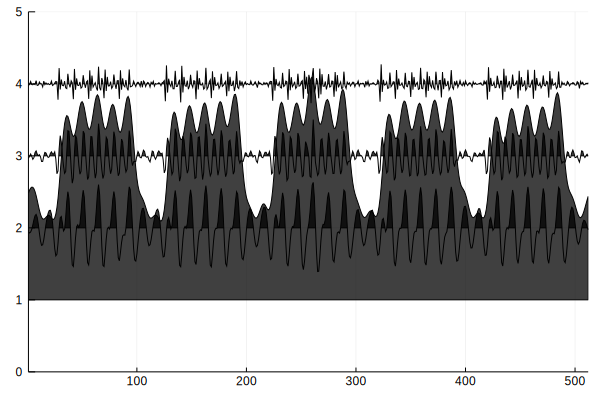

In [30]:
wiggle(decomp_1d)

In [ ]:
decomp = ac2d(float_pop_matrix, L, P, Q)

A query is started with the `@from` macro and consists of a series of query commands. `Query.jl` provides commands that can filter, project, join, flatten and group data from a `DataFrame`. A query can return an iterator, or one can materialize the results of a query into a variety of data structures, including a new `DataFrame`.

For example, we want to plot the timeseries data for one of the cities, say the one with citycode = 13101. First, we need to loop over each row in the DataFrame with the `@from` macro. Then, we want to select only the rows where citycode = 13101 with the `@where` macro. Next, We only want to keep the `dailyid` and the `datetime` columns with the `@select` macro. Finally, we want to materialize these into a new dataframe called `city1` using the `@collect` macro.

We can manipulate a data using the `Query.jl` package. We first create a datetime formate with the `DateFormat` funtion, and then we map it to the dataframe using the `@map` query and along with the `Date` function. 

The `TimeArray` time series type takes 4 arguments `timestamp`, `values`, `colnames`, and `meta`. 

The `timestamp` field is a vector of values of a child type of `TimeType`

`values` field holds the data from the time series and the row count must be the same with `timestamp` vector.